In [11]:
%matplotlib inline
import numpy as np
from feature_extractor import wav2vec2
from sklearn.manifold import TSNE
from torch.nn.utils.rnn import pad_sequence

from dataset import VietAlphabetDataset, id2label

dataset = VietAlphabetDataset()

In [2]:
feature_vectors = []
labels = []

for waveform, label in dataset:
    feat = wav2vec2(waveform)

    feature_vectors.append(feat)
    labels.append(label)

feature_vectors = pad_sequence(feature_vectors, batch_first=True).numpy()
labels = np.asarray(labels)
labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5])

In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    alpha=1e-4,
    solver="adam",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

mlp.fit(feature_vectors, labels)

Iteration 1, loss = 2.77168369
Iteration 2, loss = 10.34456062
Iteration 3, loss = 8.92424202
Iteration 4, loss = 8.46382999
Iteration 5, loss = 7.06063128
Iteration 6, loss = 3.58738303
Iteration 7, loss = 2.71548486
Iteration 8, loss = 2.30954695
Iteration 9, loss = 2.20207977
Iteration 10, loss = 2.20972419
Iteration 11, loss = 2.19770193
Iteration 12, loss = 2.18217516
Iteration 13, loss = 2.16541815
Iteration 14, loss = 2.14892817
Iteration 15, loss = 2.13370728
Iteration 16, loss = 2.12041593
Iteration 17, loss = 2.10944700
Iteration 18, loss = 2.10096169
Iteration 19, loss = 2.09491849
Iteration 20, loss = 2.09110379
Iteration 21, loss = 2.08917689
Iteration 22, loss = 2.08871198
Iteration 23, loss = 2.08924770
Iteration 24, loss = 2.09033322
Iteration 25, loss = 2.09156513
Iteration 26, loss = 2.09262037
Iteration 27, loss = 2.09327316
Iteration 28, loss = 2.09339857
Iteration 29, loss = 2.09296870
Iteration 30, loss = 2.09203482
Iteration 31, loss = 2.09070635
Iteration 32, lo

MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.2, random_state=1,
              verbose=10)

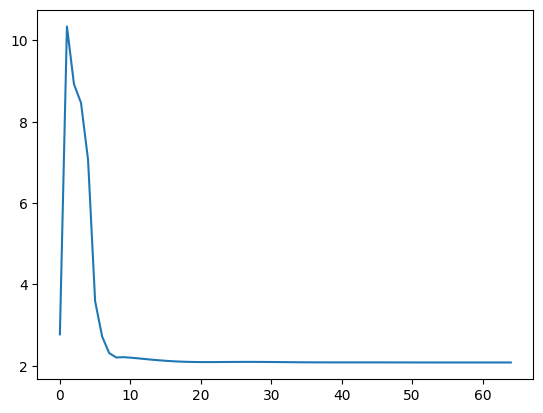

In [5]:
plt.plot(mlp.loss_curve_)

In [22]:
idx = 10
label = id2label(labels[idx])
proba = mlp.predict_proba(np.expand_dims(feature_vectors[idx], 0))
proba[:, labels[idx]]

array([0.11071611], dtype=float32)

In [7]:
model = TSNE(
    n_components=2,
    verbose=2,
).fit_transform(np.asarray(feature_vectors))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 141 samples in 0.000s...
[t-SNE] Computed neighbors for 141 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 141 / 141
[t-SNE] Mean sigma: 1.872073
[t-SNE] Computed conditional probabilities in 0.013s
[t-SNE] Iteration 50: error = 46.7683372, gradient norm = 0.3864654 (50 iterations in 0.026s)
[t-SNE] Iteration 100: error = 46.5584602, gradient norm = 0.3027618 (50 iterations in 0.024s)
[t-SNE] Iteration 150: error = 46.5196457, gradient norm = 0.3674369 (50 iterations in 0.021s)
[t-SNE] Iteration 200: error = 47.1398926, gradient norm = 0.3375542 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 47.5185127, gradient norm = 0.2950214 (50 iterations in 0.017s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.518513
[t-SNE] Iteration 300: error = 0.0832369, gradient norm = 0.0021899 (50 iterations in 0.015s)
[t-SNE] Iteration 350: error = 0.0720903, gradient norm = 0.0033564 (

In [8]:
import plotly.express as px

fig = px.scatter(model, x=0, y=1, color=labels)
fig.show()

In [13]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)